In [7]:
##Importando as bibliotecas usadas no projeto
#from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pandas as pd 
import seaborn as sns

In [2]:
# Carregamento dos dados do arquivo csv
data = pd.read_csv('./sample/sample_labels.csv', delimiter=',')
data.dataframeName = 'sample_labels.csv'

# Número de observações
num_obs = len(data)
print('O número de observações é: ',num_obs)

O número de observações é:  5606


In [3]:
absolute_path = "./sample/images"
images_path = [os.path.join(absolute_path, relative_path) for relative_path
 in sorted(os.listdir(absolute_path))]

#Para verificar se tudo que foi feito tem consistência, verificarei se o número de imagens é igual
#ao número de casos do arquivo csv
print(len(images_path))

5606


In [4]:
#Criando coluna para localizar cada imagem pelo caminho absoluto
data['full_path'] = images_path
data.head(5)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y,full_path
0,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...,5,13,060Y,M,AP,3056,2544,0.139,0.139,./sample/images/00000013_005.png
1,00000013_026.png,Cardiomegaly|Emphysema,26,13,057Y,M,AP,2500,2048,0.168,0.168,./sample/images/00000013_026.png
2,00000017_001.png,No Finding,1,17,077Y,M,AP,2500,2048,0.168,0.168,./sample/images/00000017_001.png
3,00000030_001.png,Atelectasis,1,30,079Y,M,PA,2992,2991,0.143,0.143,./sample/images/00000030_001.png
4,00000032_001.png,Cardiomegaly|Edema|Effusion,1,32,055Y,F,AP,2500,2048,0.168,0.168,./sample/images/00000032_001.png


In [5]:
#Preparando os dados para uma análise visual prévia

#Quantidade de registros por label
quantidade_registros_por_label = data['Finding Labels'].value_counts()
quantidade_registros_por_label_dataframe = quantidade_registros_por_label.to_frame()
print(quantidade_registros_por_label_dataframe)

                                                    Finding Labels
No Finding                                                    3044
Infiltration                                                   503
Effusion                                                       203
Atelectasis                                                    192
Nodule                                                         144
...                                                            ...
Atelectasis|Edema|Effusion|Infiltration|Pneumonia                1
Atelectasis|Consolidation|Edema|Infiltration|Pn...               1
Atelectasis|Effusion|Hernia                                      1
Atelectasis|Hernia|Pneumothorax                                  1
Cardiomegaly|Effusion|Emphysema                                  1

[244 rows x 1 columns]


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'No Finding'),
  Text(1, 0, 'Infiltration'),
  Text(2, 0, 'Effusion'),
  Text(3, 0, 'Atelectasis'),
  Text(4, 0, 'Nodule'),
  Text(5, 0, 'Pneumothorax'),
  Text(6, 0, 'Mass'),
  Text(7, 0, 'Consolidation'),
  Text(8, 0, 'Effusion|Infiltration'),
  Text(9, 0, 'Pleural_Thickening'),
  Text(10, 0, 'Atelectasis|Infiltration'),
  Text(11, 0, 'Atelectasis|Effusion'),
  Text(12, 0, 'Cardiomegaly'),
  Text(13, 0, 'Infiltration|Nodule'),
  Text(14, 0, 'Emphysema'),
  Text(15, 0, 'Edema'),
  Text(16, 0, 'Fibrosis'),
  Text(17, 0, 'Atelectasis|Effusion|Infiltration'),
  Text(18, 0, 'Cardiomegaly|Effusion'),
  Text(19, 0, 'Infiltration|Mass')])

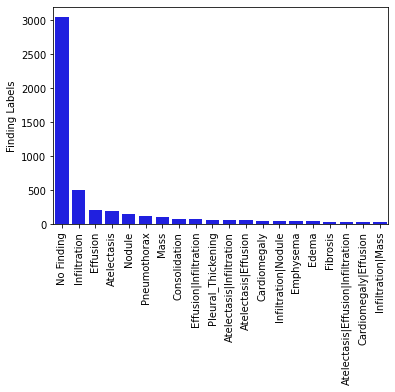

In [9]:
sns.barplot(x = quantidade_registros_por_label_dataframe.index[:20], y="Finding Labels",
 data=quantidade_registros_por_label_dataframe[:20], color = "blue")
plt.xticks(rotation = 90) 